## **Installing packages**

In [2]:
!pip install scanpy[louvain]
!pip install scanpy[leiden]

     |████████████████████████████████| 7.2MB 2.8MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 2.9MB 49.7MB/s 
     |████████████████████████████████| 3.2MB 49.2MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1025042 sha256=a53a69a444a83ce15a7bfe6c6050605a37b4eafc05807cdde815c65bcba53178
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
Successfully built louvain
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled 

In [0]:
import numpy as np
import pandas as pd

In [0]:
import scanpy as sc

# **Uploding processed data from Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [63]:
!ls "/content/drive/My Drive/"

'Application Status.PDF'
 clusterID_6p.txt
 clusterID.txt
 ClusterNames_New_6p.csv
 ClusterNames_New.csv
 cluster.txt
'Colab Notebooks'
'Copy of EHCR 4.doc.gdoc'
'CV of Mirazul_University of Malaya.pdf'
 data.malig.6p.csv
 data.malig.txt
 download.gslides
 download.php
'EHCR 4.doc'
'EHCR 4.doc.gdoc'
'Elephant Mountain'
 Enzymes.ppt
'From problem to opportunity.doc'
'Genes Dev.-2012-Tazumi-2050-62.pdf'
 GSE72056_melanoma_single_cell_revised_v2.txt
 hh
'Project Proposal Template0.ppt'
'Quantitative Systems Biology 2020'
'RIGI MIRACLE PDF VERSION V1 FREE SAMPL.pdf'
 Scanpy_Mirazul.ipynb
'SNP in miRNA creat butterfly effect in gene regulation.pdf'
'Template - Business Plan Presentation.ppt'
 Upload.7z


In [64]:
adata = sc.read_csv(filename = "/content/drive/My Drive/data.malig.6p.csv",).transpose()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [65]:
adata

AnnData object with n_obs × n_vars = 977 × 23686 

# **Cluster Information**

In [0]:
anno = pd.read_csv("/content/drive/My Drive/clusterID_6p.txt", header = None)
adata.obs['Cluster'] = list(anno[0])
adata.obs['Cluster'] = adata.obs['Cluster'].astype('category')

# **Cluster Names**

In [0]:
names = pd.read_csv("/content/drive/My Drive/ClusterNames_New_6p.csv")
new_cluster_names = list(names['ClusterName'][0:6])
adata.rename_categories('Cluster', new_cluster_names)

In [68]:
adata.obs_names

Index(['Cy81_FNA_CD45_B01_S301_comb', 'Cy80_II_CD45_B07_S883_comb',
       'Cy81_Bulk_CD45_B10_S118_comb', 'Cy80_II_CD45_C09_S897_comb',
       'Cy81_FNA_CD45_E05_S341_comb', 'Cy81_Bulk_CD45_E10_S154_comb',
       'Cy80_II_CD45_H07_S955_comb', 'Cy81_FNA_CD45_D09_S333_comb',
       'Cy80_II_CD45_H09_S957_comb', 'Cy80_II_CD45_B11_S887_comb',
       ...
       'CY88_5_B09_S693_comb', 'CY88_3_G06_S654_comb',
       'cy88_cd45pos_5_C01_S217_comb', 'CY88CD45_150813_G04_S364_comb',
       'CY88CD45POS_7_C07_S223_comb', 'CY88CD45_150813_B05_S305_comb',
       'CY88CD45POS_2_B11_S407_comb', 'CY84_PRIM_POS_All_6_D06_S426_comb',
       'CY84_PRIM_POS_All_6_G01_S457_comb',
       'CY84_PRIM_POS_All_6_E04_S436_comb'],
      dtype='object', length=977)

In [0]:
adata.obs_names_make_unique()

In [0]:
adata.var_names_make_unique()

**Top 15 expressed genes in the dataset**

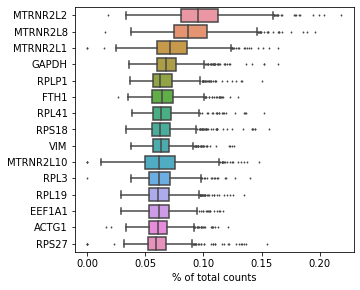

In [71]:
sc.pl.highest_expr_genes(adata, n_top=15)

# **Data matrix normalization**

In [0]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [0]:
adata.obs['n_counts'] = adata.X.sum(axis=1)

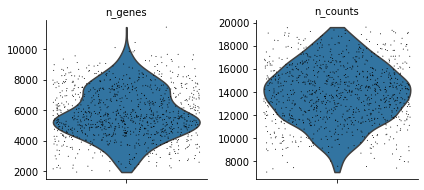

In [74]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

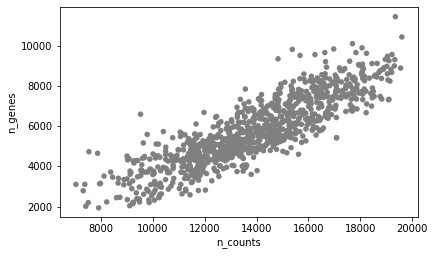

In [75]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [0]:
adata = adata[adata.obs.n_genes > 3500, :]

In [77]:
adata

View of AnnData object with n_obs × n_vars = 905 × 19721 
    obs: 'Cluster', 'n_genes', 'n_counts'
    var: 'n_cells'

In [0]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [79]:
sc.pp.log1p(adata)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_simple.py:297: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


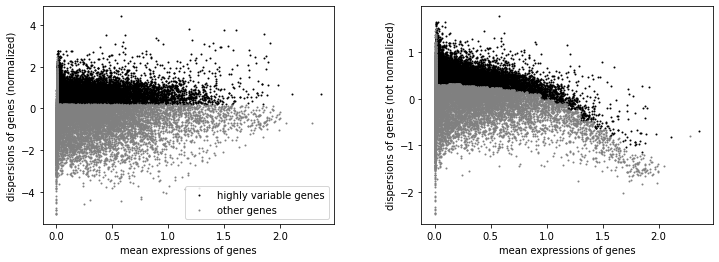

In [80]:
sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=3.5, min_disp=0.2)
sc.pl.highly_variable_genes(adata)

In [0]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata, max_value=10)

In [82]:
adata

AnnData object with n_obs × n_vars = 905 × 8375 
    obs: 'Cluster', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

# **PCA Plot**

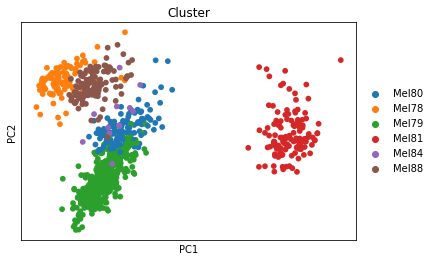

In [83]:
sc.tl.pca(adata)
sc.pl.pca(adata, color = ['Cluster'])

# **tSNE Plot**

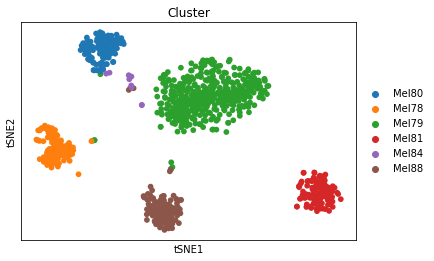

In [84]:
sc.tl.tsne(adata)
sc.pl.tsne(adata,color = ['Cluster'])

# **UMAP Plot**

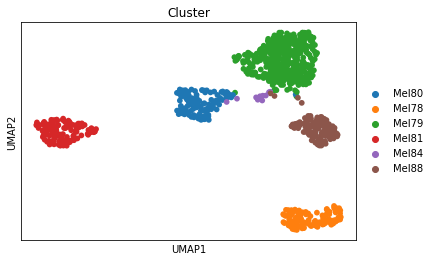

In [85]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['Cluster'])

# **Leiden Clustering**

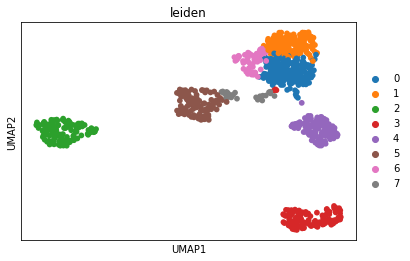

In [86]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


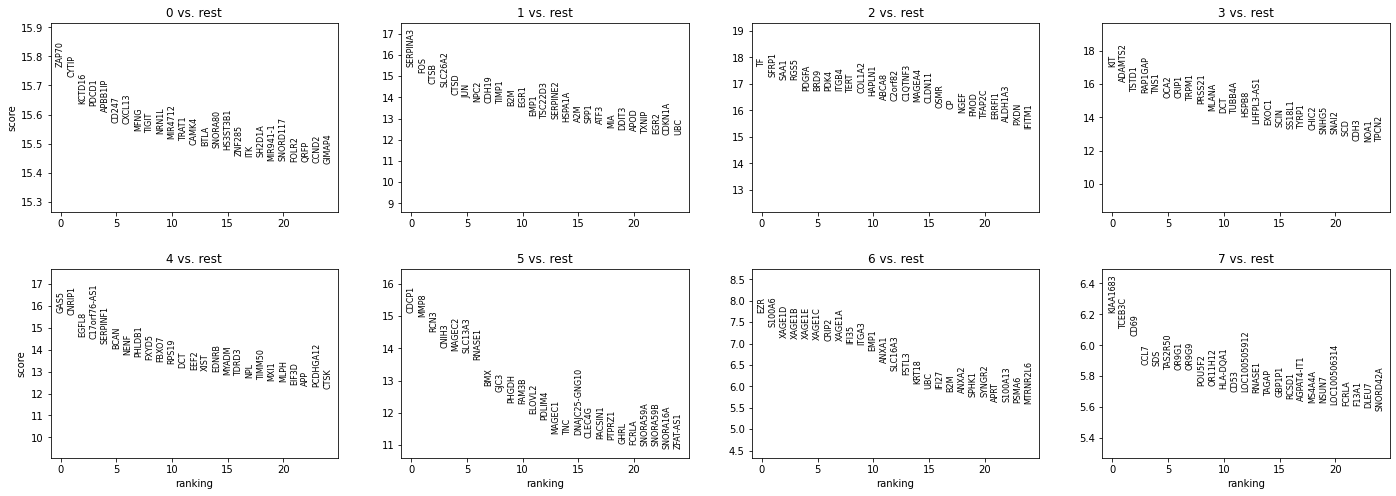

In [87]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)